## Observations and Insights 

In [1]:
#OBSERVATIONS: 
#Capomulin & Ramicane seemed more effective at reducing tumor volume than Infubinol & Ceftamin

#Weight had a positive correlation with Average Tumor Volume

#Not only did Capomulin & Ramicane have the most effective results, they also took the most measurments
#and the lowest STD's and SEM's

#Ketapril & Naftisol had slightly higher Tumor volume averages than the Placebo

In [2]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data=mouse_metadata.merge(study_results,on="Mouse ID",how="outer")
# Display the data table for preview
data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
data["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate=data.groupby(["Mouse ID","Timepoint"]).size()                                 
duplicate= duplicate[duplicate > 1]
duplicate


Mouse ID  Timepoint
g989      0            2
          5            2
          10           2
          15           2
          20           2
dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
data.loc[(data["Mouse ID"])=="g989",:]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
regimen=clean_data.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_df1=pd.DataFrame({"Mean":regimen["Tumor Volume (mm3)"].mean(),
                          "Median":regimen["Tumor Volume (mm3)"].median(),
                          "Variance":regimen["Tumor Volume (mm3)"].var(),
                          "Standard Deviation":regimen["Tumor Volume (mm3)"].std(),
                          "SEM":regimen["Tumor Volume (mm3)"].sem()})
# Assemble the resulting series into a single summary dataframe.
regimen_df1


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
# Using the aggregation method, produce the same summary statistics in a single line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
clean_data["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

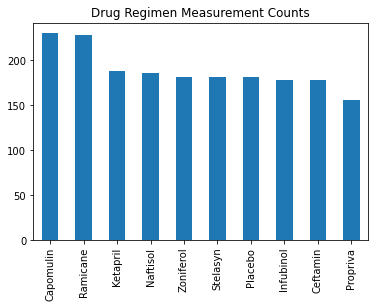

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
clean_data["Drug Regimen"].value_counts().plot(kind="bar",title="Drug Regimen Measurement Counts")

<BarContainer object of 10 artists>

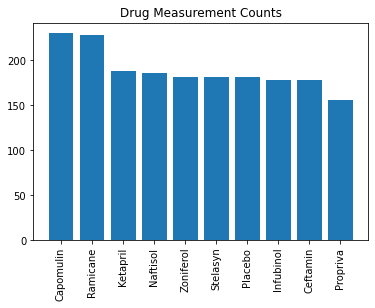

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis=np.arange(len(regimen["Drug Regimen"]))
counts=pd.DataFrame({"Counts":clean_data["Drug Regimen"].value_counts()})
drugs=counts.index.tolist()
counts=counts.iloc[:,0]

plt.xticks(x_axis,drugs,rotation="vertical")
plt.title("Drug Measurement Counts")
plt.bar(x_axis,counts)

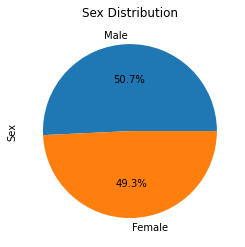

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_data["Sex"].value_counts().plot(kind="pie",title="Sex Distribution",autopct='%1.1f%%')

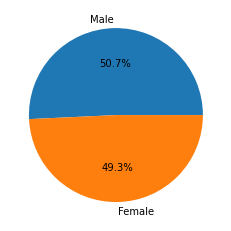

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(clean_data["Sex"].value_counts(), labels=clean_data["Sex"].unique(),autopct="%1.1f%%")

plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse=clean_data.groupby("Mouse ID")
mouse=pd.DataFrame({"Last Timepoint":mouse["Timepoint"].max()})
tumor_vol=clean_data.merge(mouse,on="Mouse ID")
tumor_vol

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2,45
1884,z969,Naftisol,Male,9,30,30,65.841013,3,45
1885,z969,Naftisol,Male,9,30,35,69.176246,4,45
1886,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [16]:
tumor_vol=tumor_vol.loc[tumor_vol["Timepoint"]==tumor_vol["Last Timepoint"],:]
Capomulin=tumor_vol.loc[(tumor_vol["Drug Regimen"]=="Capomulin"),:]
Ramicane=tumor_vol.loc[(tumor_vol["Drug Regimen"]=="Ramicane"),:]
Infubinol=tumor_vol.loc[(tumor_vol["Drug Regimen"]=="Infubinol"),:]
Ceftamin=tumor_vol.loc[(tumor_vol["Drug Regimen"]=="Ceftamin"),:]



In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=[Capomulin,Ramicane,Infubinol,Ceftamin]

# Create empty list to fill with tumor vol data (for plotting)
vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
q1=[treatments[x]["Tumor Volume (mm3)"].quantile(.25) for x in range(len(treatments))]
q3=[treatments[x]["Tumor Volume (mm3)"].quantile(.75) for x in range(len(treatments))]
iqr=[q3[x]-q1[x]for x in range(len(treatments))]
lb=[(q1[x]-(iqr[x]*1.5)).round(2) for x in range(len(treatments))]
ub=[(q3[x]+(iqr[x]*1.5)).round(2) for x in range(len(treatments))]
Outliers=[treatments[x].loc[(treatments[x]["Tumor Volume (mm3)"]<lb[x]),:] for x in range(4)]
Outliers[2]




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
669,c326,Infubinol,Female,18,25,5,36.321346,0,5


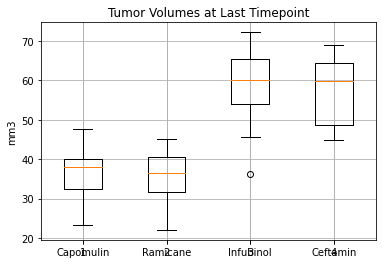

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax=plt.subplots()
ax.set_title('Tumor Volumes at Last Timepoint')
ax.set_ylabel('mm3')
plt.xticks([1,2,3,4],["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.boxplot([treatments[x]["Tumor Volume (mm3)"] for x in range(len(treatments))])
plt.grid()

## Line and Scatter Plots

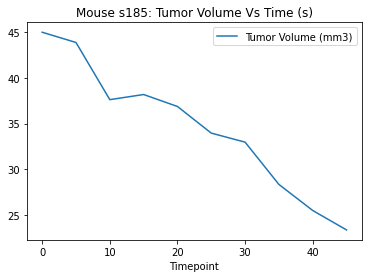

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Cap_mouse=clean_data.loc[(clean_data["Mouse ID"]=="s185"),:]
Cap_mouse.plot.line(x="Timepoint",y="Tumor Volume (mm3)",title="Mouse s185: Tumor Volume Vs Time (s)")





In [20]:
Capomulin_group=Capomulin.groupby(["Mouse ID"])
Capomulin_df=pd.DataFrame({"Avg Tumor Volume":Capomulin_group["Tumor Volume (mm3)"].mean().round(2)})
cap_df=Capomulin_df.merge(clean_data, on="Mouse ID", how="inner")
cap_df

,Mouse ID,Avg Tumor Volume,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,38.98,Capomulin,Female,9,22,0,45.000000,0
1,b128,38.98,Capomulin,Female,9,22,5,45.651331,0
2,b128,38.98,Capomulin,Female,9,22,10,43.270852,0
3,b128,38.98,Capomulin,Female,9,22,15,43.784893,0
4,b128,38.98,Capomulin,Female,9,22,20,42.731552,0
...,...,...,...,...,...,...,...,...,...
225,y793,31.90,Capomulin,Male,17,17,25,38.992734,2
226,y793,31.90,Capomulin,Male,17,17,30,35.726023,2
227,y793,31.90,Capomulin,Male,17,17,35,36.327870,2
228,y793,31.90,Capomulin,Male,17,17,40,31.475411,2


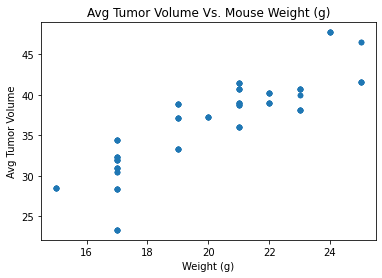

In [21]:
cap_df.plot.scatter(x="Weight (g)",y="Avg Tumor Volume",title="Avg Tumor Volume Vs. Mouse Weight (g)")

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
avg=cap_df.iloc[:,1]
wt=cap_df.iloc[:,5]
correlation = st.pearsonr(avg,wt)
# for mouse weight and average tumor volume for the Capomulin regimen
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
correlation=correlation[0].round(2)
xval=cap_df["Weight (g)"]
yval=cap_df["Avg Tumor Volume"]

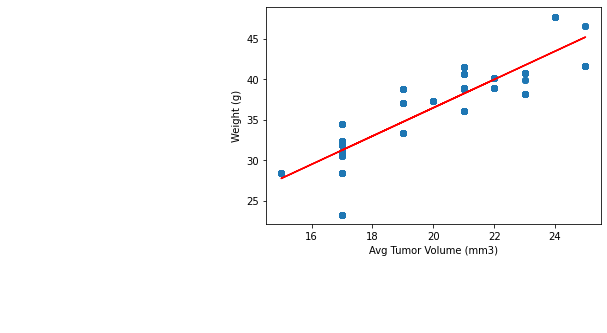

In [23]:
xval=cap_df["Weight (g)"]
yval=cap_df["Avg Tumor Volume"]
(slope,intercept,rvalue,pvalue,stderr)=linregress(xval,yval)
regress_values=xval*slope+intercept
line_eq="y = "+str(round(slope,2))+"x +"+str(round(intercept,2))
plt.scatter(xval,yval)
plt.plot(xval,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15, color="red")
plt.xlabel("Avg Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()